## **BT thực hành 3.1: PCA - Lập trình và thư viện sklearn**


> Cập nhật: **07/2023**



In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Edu/Chia se hoc lieu/LDS3/Bai tap HV/Ch3_PCA'

Mounted at /content/gdrive


In [1]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

---
## **Yêu cầu 1: Lập trình**
- Áp dụng PCA với ma trận A có 6 dòng, 3 cột
- Chọn ra 2 thành phần chính có các giá trị riêng lớn nhất để tạo không gian mới, với ma trận B là kết quả phép chiếu của ma trận A
---


In [24]:
## Tạo ma trận A(6, 3) với các giá trị ngẫu nhiên từ 1 đến 255
np.random.seed(1)
m, n, min, max = 6, 3, 1, 255
A = np.random.randint(min, max, (m, n))
A

array([[ 38, 236, 141],
       [ 73, 138, 204],
       [134,  80, 193],
       [145, 130, 205],
       [ 72, 238, 253],
       [135,  26, 179]])

In [26]:
## Trọng tâm (trung bình theo CỘT)
M = np.mean(A, axis = 0)
M

array([ 99.5       , 141.33333333, 195.83333333])

In [27]:
## Ma trận trung tâm (dời gốc tọa độ về trọng tâm --> tọa độ mới của dữ liệu)
C = A - M
C

array([[ -61.5       ,   94.66666667,  -54.83333333],
       [ -26.5       ,   -3.33333333,    8.16666667],
       [  34.5       ,  -61.33333333,   -2.83333333],
       [  45.5       ,  -11.33333333,    9.16666667],
       [ -27.5       ,   96.66666667,   57.16666667],
       [  35.5       , -115.33333333,  -16.83333333]])

In [28]:
## Ma trận hiệp phương sai
##     Lưu ý: Quy định features theo DÒNG, đối tượng theo CỘT --> chuyển vị C
V = np.cov(C.T)
V

array([[ 1952.3       , -3023.6       ,   261.1       ],
       [-3023.6       ,  7101.86666667,   463.86666667],
       [  261.1       ,   463.86666667,  1343.36666667]])

In [29]:
## Phân rã SVD
values, vectors = np.linalg.eig(V)

print('Singular values (Lambda)', values.shape, ': \n', values, '\n')
print('Eigenvectors    (B)     ', vectors.shape, ': \n', vectors, '\n') ## ma trận cơ sở

Singular values (Lambda) (3,) : 
 [8512.03039917  363.35429011 1522.14864405] 

Eigenvectors    (B)      (3, 3) : 
 [[-0.41677677  0.82254174  0.38693955]
 [ 0.90796398  0.39710245  0.13383215]
 [ 0.04357211 -0.40710531  0.91234135]] 



In [30]:
## Tọa độ trong không gian MỚI (phép chiếu) --> vectors.T là ma trận cơ sở
P = vectors.T @ A.T
P.T

array([[204.58565097,  67.57091647, 174.92822146],
       [103.76303663,  31.79620281, 232.83305976],
       [ 25.19844951,  63.41746508, 238.63835246],
       [ 66.53496965,  87.43528311, 260.53439136],
       [197.11124533,  50.73574621, 290.53406172],
       [-24.858392  ,  48.49594873, 219.02557683]])

In [22]:
## Sắp xếp trị riêng GIẢM DẦN để chọn các thành phần chính
sort_  = np.argsort(values)[::-1]
print(sort_)
values = values[sort_] # check lại chỗ này???
print(values)

[0 1 2]
[8512.03039917 1522.14864405  363.35429011]


In [12]:
## Sắp xếp tương ứng các vectors riêng
vectors = vectors[:, sort_]
vectors

array([[-0.41677677,  0.38693955,  0.82254174],
       [ 0.90796398,  0.13383215,  0.39710245],
       [ 0.04357211,  0.91234135, -0.40710531]])

In [ ]:
## Chọn k = 2 thành phần chính có singular values lớn nhất --> Ma trận cơ sở mới B
k = 2
B = vectors[:, :k]
B

array([[-0.41677677,  0.38693955],
       [ 0.90796398,  0.13383215],
       [ 0.04357211,  0.91234135]])

In [ ]:
## Tọa độ trong không gian MỚI B (phép chiếu) 2 chiều
P = B.T @ A.T
P.T

array([[204.58565097, 174.92822146],
       [103.76303663, 232.83305976],
       [ 25.19844951, 238.63835246],
       [ 66.53496965, 260.53439136],
       [197.11124533, 290.53406172],
       [-24.858392  , 219.02557683]])

---
## **Yêu cầu 2: Sử dụng hàm PCA() của sklearn**
- Đọc tập tin **Classification_12f_C.csv** vào dataframe
- Áp dụng PCA để giảm xuống k chiều (k > 2). Giải thích nguyên nhân hay cơ sở để chọn giá trị của k
- Biểu diễn trực quan dữ liệu với k = 2
- Nhận xét về kết quả phân loại (classification)
---



In [34]:
## Đọc tập tin vào dataframe
data = pd.read_csv('Data/Classification_12f_C.csv')
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,Class
0,-2.403589,-0.218339,-3.015506,2.187585,-1.415101,-0.000049,2.920957,-4.165317,-2.237563,1.567810,4.056278,-5.816942,3
1,-0.922966,6.564721,8.542600,-3.676891,1.526910,-6.132242,-1.284702,-7.841047,10.161966,-1.933277,8.959247,-2.492584,4
2,9.381326,-0.157043,9.674137,4.059390,9.150245,-8.320246,10.076978,-11.596349,-2.900057,-1.890156,0.390029,-5.383296,0
3,-7.610665,-10.375051,0.398027,-6.178855,5.848558,2.276540,-1.726164,9.378226,1.146725,-9.630693,-8.620247,-0.552103,2
4,8.586239,-4.265564,4.788978,4.309953,2.938052,-4.294121,6.980088,-9.878268,-5.017204,0.154492,7.647917,-1.004416,0


In [35]:
## Mô tả dữ liệu: Biến phân lớp (target variable): 'Class' --> cột cuối cùng
target = 'Class'
print('* Biến phân lớp:', target)

## Danh sách các features
nb_features = data.shape[1] - 1
features    = data.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features))

* Biến phân lớp: Class
* Số lượng features = 12
  Các features: f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12


In [41]:
## Áp dụng PCA để giảm xuống k chiều (k > 2)
from sklearn.decomposition import PCA

## Loại bỏ cột Class trong dataframe
x = data.drop(columns = ['Class'])

#   https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff
#   - The pca.explained_variance_ratio_ returns a vector of the variance explained by each dimension.
#   - The pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.
#   - The pca.explained_variance_ratio_.cumsum() will return a vector x
#     such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

#   (1) PCA().components_: Chuyển vị của ma trận vectơ riêng EigenVectors.T
#   (2) PCA().explained_variance_: Các giá trị riêng
#   (3) PCA().explained_variance_ratio_: Tỷ lệ phương sai so với dữ liệu gốc
#   (4) Hàm numpy.cumsum()
x.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,-2.403589,-0.218339,-3.015506,2.187585,-1.415101,-0.000049,2.920957,-4.165317,-2.237563,1.567810,4.056278,-5.816942
1,-0.922966,6.564721,8.542600,-3.676891,1.526910,-6.132242,-1.284702,-7.841047,10.161966,-1.933277,8.959247,-2.492584
2,9.381326,-0.157043,9.674137,4.059390,9.150245,-8.320246,10.076978,-11.596349,-2.900057,-1.890156,0.390029,-5.383296
3,-7.610665,-10.375051,0.398027,-6.178855,5.848558,2.276540,-1.726164,9.378226,1.146725,-9.630693,-8.620247,-0.552103
4,8.586239,-4.265564,4.788978,4.309953,2.938052,-4.294121,6.980088,-9.878268,-5.017204,0.154492,7.647917,-1.004416


### **Chọn giá trị cho k như thế nào ?**

**CÁCH 1**: *Chọn k dựa trên đồ thị biểu diễn phương sai tích lũy (phương pháp ELBOW)*



In [45]:
## Áp dụng PCA với k CHƯA được xác định
##    số chiều ngầm định:  n_components = min(n_samples, n_features)
pca = PCA().fit(x) # PCA().fit(): thực hiện PCA
pca

PCA()

In [46]:
## Phương sai trên từng chiều
print(pca.explained_variance_.flatten())

[149.99684329 115.77901472  59.48623903  36.34044988  18.57071803
   4.5190582    4.14221852   4.00306212   3.91355344   3.84819396
   3.56443736   3.30005464]


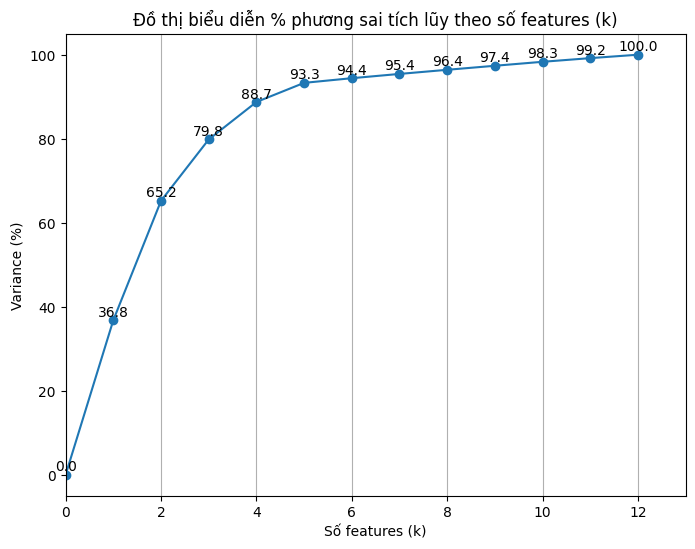

In [ ]:
# Các điểm dữ liệu
points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0) # Thêm điểm k = 0, variance = 0
x_i = np.arange(0, nb_features + 1)
y_i = (points[-13:])//0.01/100

plt.figure(figsize = (8, 6))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, round(y_i[i], 1), ha = 'center', va = 'baseline')
    # tung độ của text cao hơn point 1 đơn vị

plt.show()

Dựa trên đồ thị thì có thể chọn k trong khoảng [5, 7]

In [ ]:
## Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(x)

    newVar = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' %k, ': phương sai tích lũy ~ %.1f%%' %newVar,
          '--> tăng ~ %.1f%%' %(newVar - var))
    var = newVar

   * k =  1 : phương sai tích lũy ~ 36.8% --> tăng ~ 36.8%
   * k =  2 : phương sai tích lũy ~ 65.2% --> tăng ~ 28.4%
   * k =  3 : phương sai tích lũy ~ 79.8% --> tăng ~ 14.6%
   * k =  4 : phương sai tích lũy ~ 88.7% --> tăng ~ 8.9%
   * k =  5 : phương sai tích lũy ~ 93.3% --> tăng ~ 4.6%
   * k =  6 : phương sai tích lũy ~ 94.4% --> tăng ~ 1.1%
   * k =  7 : phương sai tích lũy ~ 95.4% --> tăng ~ 1.0%
   * k =  8 : phương sai tích lũy ~ 96.4% --> tăng ~ 1.0%
   * k =  9 : phương sai tích lũy ~ 97.4% --> tăng ~ 1.0%
   * k = 10 : phương sai tích lũy ~ 98.3% --> tăng ~ 0.9%
   * k = 11 : phương sai tích lũy ~ 99.2% --> tăng ~ 0.9%
   * k = 12 : phương sai tích lũy ~ 100.0% --> tăng ~ 0.8%


**CÁCH 2**: *Chọn k dựa trên ngưỡng phương sai tích lũy mong muốn*

In [ ]:
## Giả sử muốn giữ lại tối thiểu 95% phương sai tích lũy
threshold = .95
percent   = threshold * 100

## Áp dụng PCA với ngưỡng đã chọn
pca = PCA(threshold) # khai báo ngưỡng cần bảo đảm khi giảm chiều
pca.fit_transform(x) # thực hiện PCA có giảm chiều

## Giá trị k thu được, với phương sai tích lũy tương ứng
k   = pca.n_components_
var = sum(pca.explained_variance_ratio_) * 100
print('* Muốn phương sai tích lũy >= %.1f%%' %percent, 'thì k >= %d' %k, '--> %.1f%%' %var)

* Muốn phương sai tích lũy >= 95.0% thì k >= 7 --> 95.4%


In [ ]:
## Kiểm chứng: Phân tích chi tiết theo các ngưỡng phương sai từ 50% đến 99%
A = np.array([.5, .6, .7, .8, .9, .95, .99])
for t in A:
    percent = t * 100
    pca     = PCA(t)

    pca.fit(x)
    k   = pca.n_components_
    var = sum(pca.explained_variance_ratio_) * 100
    print('- Muốn phương sai tích lũy >= %.1f%%' %percent, 'thì k >= %2d' %k,  '(var ~ %.1f%%)' %var)

- Muốn phương sai tích lũy >= 50.0% thì k >=  2 (var ~ 65.2%)
- Muốn phương sai tích lũy >= 60.0% thì k >=  2 (var ~ 65.2%)
- Muốn phương sai tích lũy >= 70.0% thì k >=  3 (var ~ 79.8%)
- Muốn phương sai tích lũy >= 80.0% thì k >=  4 (var ~ 88.7%)
- Muốn phương sai tích lũy >= 90.0% thì k >=  5 (var ~ 93.3%)
- Muốn phương sai tích lũy >= 95.0% thì k >=  7 (var ~ 95.4%)
- Muốn phương sai tích lũy >= 99.0% thì k >= 11 (var ~ 99.2%)


<Figure size 600x600 with 0 Axes>

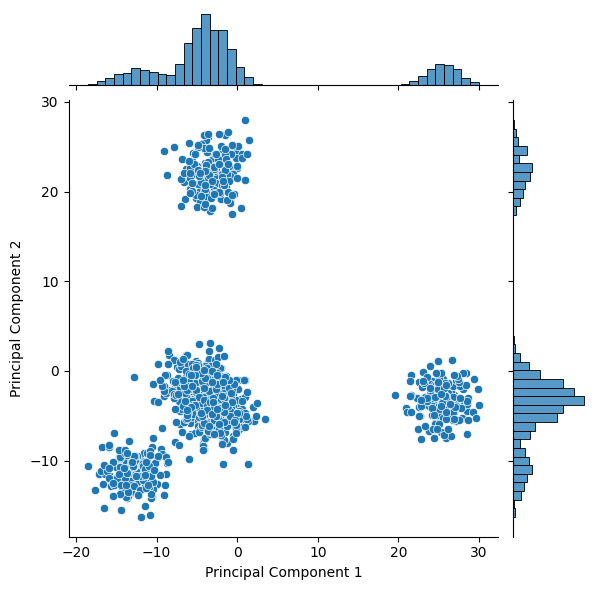

In [ ]:
## Biểu diễn trực quan dữ liệu với k = 2
k   = 2
pca = PCA(k) # khai báo số chiều muốn giảm
pca.fit(x)   # thực hiện PCA

## Gán tên cho các Principal Components
PC_name = ['Principal Component 1', 'Principal Component 2']

## Chiếu dữ liệu vào không gian mới (Transform data)
P           = pca.transform(x)
principalDf = pd.DataFrame(data = P, columns = PC_name)

## Biểu diễn trực quan dữ liệu (KHÔNG phân lớp)
plt.figure(figsize = (6, 6))
sns.jointplot(x = PC_name[0], y = PC_name[1], data = principalDf)
plt.show()


* Ma trận P_T (có thêm biến phân lớp Class)
   Principal Component 1  Principal Component 2  Class
0              -0.689247              -1.068850      3
1              -4.740836              -3.443031      4
2             -16.815422              -8.492182      0
3              -3.683586              24.981589      2
4              -9.033472              -9.447506      0 



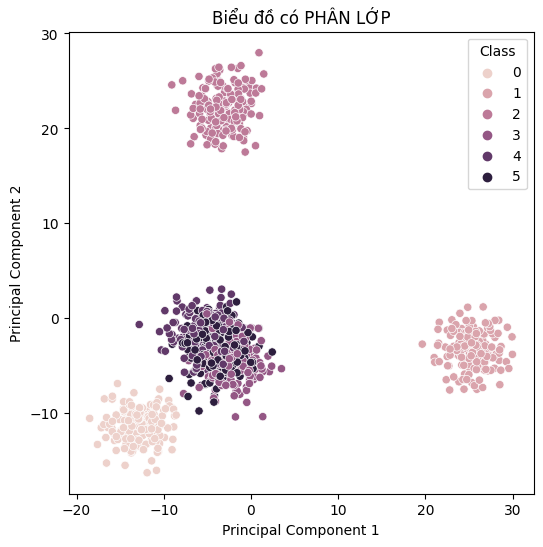

In [ ]:
## Lấy cột phân lớp (Class) trong file dữ liệu
y = np.array(data.Class)
y = pd.DataFrame(data = y, columns = [target])

## Ghép cột phân lớp (Class) vào ma trận PCA
finalDf = pd.concat([principalDf, y], axis = 1)
print('\n* Ma trận P_T (có thêm biến phân lớp Class)')
print(finalDf.head(), '\n')

## Biểu diễn trực quan dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (6, 6))
plt.title('Biểu đồ có PHÂN LỚP')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf, hue = target, legend = 'full')
plt.show()

### **Nhận xét:**
*   Kết quả phân lớp không tốt vì với k = 2 thì phương sai tích lũy ~ 65%
*   Có thể cải thiện chất lượng ?

           0         1         2         3         4         5         6   \
0   -0.932461 -0.188014 -0.650051  0.472762 -0.422844  0.202860  0.298135   
1   -0.686963  0.978499  1.215289 -0.873189  0.067499 -0.992452 -0.401489   
2    1.021566 -0.177473  1.397906  0.902359  1.338075 -1.418947  1.488561   
3   -1.795833 -1.934710 -0.099147 -1.447413  0.787785  0.646623 -0.474928   
4    0.889735 -0.884034  0.609500  0.959865  0.302693 -0.634158  0.973384   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.447022  0.561585  0.841989  0.002299 -0.229137 -1.384785 -0.454429   
996 -2.047569 -1.402942  0.058124 -1.260240  0.593805 -0.112219 -0.081103   
997  0.050746  0.339319 -0.404913  1.224433 -0.299970  1.260385  0.830087   
998  0.681584 -0.627005 -0.369019  0.440876  1.058203  1.475706  0.022387   
999 -1.638402 -1.238684  0.365245 -1.377705  0.412435  0.139611  0.189266   

           7         8         9         10        11        12  
0   -0.27

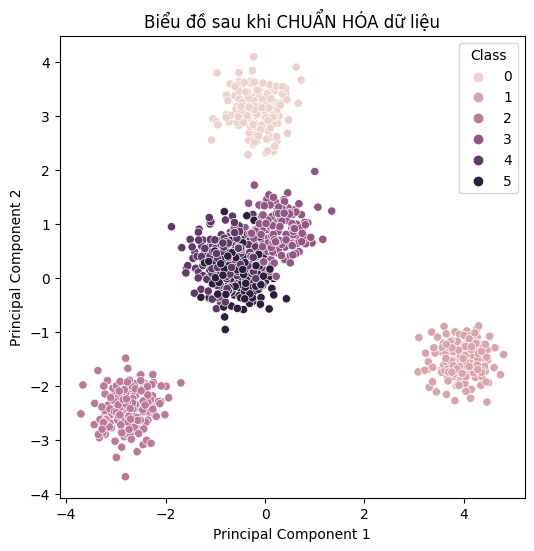

In [ ]:
pca_norm  = PCA(k)

## Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
data_norm = pd.DataFrame(StandardScaler().fit_transform(data)) # tự động loại cột Class
print(data_norm)

## Áp dụng PCA
pca_norm.fit(data_norm)

## Transform data
P_norm           = pca_norm.transform(data_norm)
principalDf_norm = pd.DataFrame(data = P_norm, columns = PC_name)

## Lấy cột phân lớp (Class) trong file dữ liệu
y = np.array(data.Class)
y = pd.DataFrame(data = y, columns = [target])

## Ghép cột phân lớp (Class) vào ma trận PCA
finalDf_norm = pd.concat([principalDf_norm, y], axis = 1)

## Biểu diễn trực quan dữ liệu (có PHÂN LỚP)
plt.figure(figsize = (6, 6))
plt.title('Biểu đồ sau khi CHUẨN HÓA dữ liệu')
sns.scatterplot(x = PC_name[0], y = PC_name[1], data = finalDf_norm, hue = target, legend = 'full')
plt.show()